In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
raw_data = pd.read_csv('data/train.csv', encoding = 'Big5')
raw_data = raw_data.drop(['日期', '測站', '測項'], axis = 1)
# raw_data = raw_data.drop(['日期', '測站'], axis = 1)
raw_data = raw_data.replace('NR', -1)
raw_data = raw_data.astype(np.float)


raw_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,14.00,14.00,14.00,13.00,12.00,12.00,12.00,12.00,15.00,17.00,...,22.00,22.00,21.00,19.00,17.00,16.00,15.00,15.00,15.00,15.00
1,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
2,0.51,0.41,0.39,0.37,0.35,0.30,0.37,0.47,0.78,0.74,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,0.20,0.15,0.13,0.12,0.11,0.06,0.10,0.13,0.26,0.23,...,0.10,0.13,0.14,0.23,0.18,0.12,0.10,0.09,0.10,0.08
4,0.90,0.60,0.50,1.70,1.80,1.50,1.90,2.20,6.60,7.90,...,2.50,2.20,2.50,2.30,2.10,1.90,1.50,1.60,1.80,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,1.80,1.80,1.80,1.80,1.80,1.70,1.70,1.80,1.80,1.80,...,1.80,1.80,2.00,2.10,2.00,1.90,1.90,1.90,2.00,2.00
4316,46.00,13.00,61.00,44.00,55.00,68.00,66.00,70.00,66.00,85.00,...,59.00,308.00,327.00,21.00,100.00,109.00,108.00,114.00,108.00,109.00
4317,36.00,55.00,72.00,327.00,74.00,52.00,59.00,83.00,106.00,105.00,...,18.00,311.00,52.00,54.00,121.00,97.00,107.00,118.00,100.00,105.00
4318,1.90,2.40,1.90,2.80,2.30,1.90,2.10,3.70,2.80,3.80,...,2.30,2.60,1.30,1.00,1.50,1.00,1.70,1.50,2.00,2.00


In [3]:
# raw_data.at[10, '1']
#raw_data.loc[10] 一行的数据 + label
ITEM_NUM    = 18 # CO CH4 ... WS_HR 一共 18 个测项
PM2_5_INDEX = 9 # pm2.5 的数据都在每一天数据的第 10 行
HOUR_NUM    = 9

ok,数据需要进行预处理。在本次模型中，我们就只取前九个时刻的 ```pm2.5``` 数值。


所以我只取了所有 ```pm2.5``` 的数据。


同时进行特征缩放，可以使用归一化.

In [4]:
all_pm2_5 = raw_data.loc[[x for x in range(raw_data.shape[0]) if x % ITEM_NUM == PM2_5_INDEX]]
all_pm2_5.reset_index(drop = True, inplace = True)
# all_pm2_5 = (all_pm2_5 - all_pm2_5.mean()) / all_pm2_5.std() # 默认以 axis = 1 也就是一列方向求 mean/std
# print(all_pm2_5[:2])
# all_pm2_5[:2].mean().shape # 默认以 axis = 1 也就是一列方向求 mean
all_pm2_5

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,26.0,39.0,36.0,35.0,31.0,28.0,25.0,20.0,19.0,30.0,...,36.0,45.0,42.0,49.0,45.0,44.0,41.0,30.0,24.0,13.0
1,21.0,23.0,30.0,30.0,22.0,18.0,13.0,13.0,11.0,22.0,...,53.0,43.0,43.0,45.0,46.0,32.0,16.0,19.0,22.0,26.0
2,19.0,25.0,27.0,20.0,16.0,14.0,15.0,8.0,4.0,9.0,...,32.0,36.0,34.0,45.0,40.0,41.0,23.0,29.0,23.0,37.0
3,27.0,27.0,14.0,20.0,22.0,24.0,26.0,33.0,48.0,50.0,...,62.0,55.0,56.0,67.0,78.0,83.0,90.0,75.0,85.0,82.0
4,80.0,80.0,76.0,81.0,75.0,66.0,70.0,65.0,66.0,57.0,...,64.0,73.0,57.0,57.0,53.0,70.0,70.0,60.0,68.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,5.0,9.0,17.0,26.0,33.0,32.0,24.0,16.0,16.0,21.0,...,8.0,16.0,28.0,37.0,39.0,36.0,36.0,31.0,26.0,19.0
236,21.0,26.0,26.0,31.0,29.0,21.0,13.0,13.0,21.0,23.0,...,12.0,6.0,4.0,11.0,11.0,5.0,0.0,6.0,6.0,5.0
237,0.0,2.0,2.0,3.0,3.0,3.0,11.0,13.0,14.0,8.0,...,31.0,31.0,36.0,31.0,31.0,34.0,39.0,36.0,24.0,23.0
238,14.0,16.0,13.0,14.0,21.0,19.0,23.0,18.0,17.0,24.0,...,21.0,21.0,19.0,19.0,25.0,19.0,11.0,0.0,7.0,7.0


现在数据预处理，构造一个 ```shape = (..., 9)``` 的 ```train set```。和对应行数的 ```y_train```。


```x_train``` 处理的顺序为 ```0 - 8, 1 - 9, 2 - 10 ...``` 以此类推

In [5]:
def train_data_treatment(raw_data):
    # 创建一个空的
    x_train = np.array([]).reshape(0, HOUR_NUM) 
    y_train = np.array([]).reshape(0, 1)
    for i in range(0, all_pm2_5.shape[1] - HOUR_NUM):
        nine_hours_pm2_5 = all_pm2_5[[ str(x) for x in range(i, i + HOUR_NUM) ]].values
        next_hour_pm2_5  = all_pm2_5[[ str(i + HOUR_NUM) ]].values
        x_train = np.append(x_train, nine_hours_pm2_5, axis = 0)
        y_train = np.append(y_train, next_hour_pm2_5, axis = 0)
    return x_train, np.squeeze(y_train)
    
x_train, y_train = train_data_treatment(all_pm2_5)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[26. 39. 36. ... 25. 20. 19.]
 [21. 23. 30. ... 13. 13. 11.]
 [19. 25. 27. ... 15.  8.  4.]
 ...
 [31. 31. 36. ... 39. 36. 24.]
 [21. 21. 19. ... 11.  0.  7.]
 [ 1.  7. 24. ... 28. 17. 24.]]
[30. 22.  9. ... 23.  7. 29.]
(3600, 9)
(3600,)


接下来就是 train set 与 validation set 的分割

我们可以自己决定一个比例，我就定个 ```0.1``` 。(train : vali = 9 : 1) 

有效集的意义在于，检验模型在 train data 上的表现是否好的。

In [6]:
def split_train_valid(x_train, y_train, valid_percent = 0.1):
    sample_num  = x_train.shape[0]
    feature_num = x_train.shape[1]
    valid_num   = int(sample_num * 0.1) # 切片得整数
    order       = np.arange(sample_num)
    np.random.shuffle(order)
    x_valid_set, x_train_set = x_train[order][ : valid_num ], x_train[order][ valid_num : ]
    y_valid_set, y_train_set = y_train[order][ : valid_num ], y_train[order][ valid_num : ]

    return x_train_set, y_train_set, x_valid_set, y_valid_set
    
x_train_set, y_train_set, x_valid_set, y_valid_set = split_train_valid(x_train, y_train)
print(x_train_set)
print(y_train_set)

[[10.  2.  3. ... 12. 15. 27.]
 [65. 50. 38. ... 15. 13. 12.]
 [15. 18. 13. ... 20. 19. 17.]
 ...
 [20. 23. 27. ... 52. 39. 22.]
 [ 9.  8.  0. ...  0.  7. 29.]
 [11.  8.  7. ... 13.  6.  7.]]
[31. 22.  7. ... 26. 42. 16.]


ok, 接下来搞一下各个梯度下降的算法。

在这之前，我们还是要熟悉一下前三部

1. define function set
2. find loss function
3. find best function

function set 就使用线性回归
$$y = w * x + b$$

loss function 则是使用
$$L(w,b) = 1/(2·num) · sum(y - (w ·x + b))^2$$

第三部则就是梯度下降。
$$∑(𝑛=1)^10▒2(𝑦 ̂^𝑛−(𝑏+𝑤∙𝑥_𝑐𝑝^𝑛 ))(−𝑥_𝑐𝑝^𝑛 ) $$

In [7]:
# 一般的梯度下降
def gd(x_train, y_train, l_rate = 0.00001):
#     l_rate        = 0.00001 # 学习率 之前设置为 0.001 结果直接坏掉
    sample_num    = x_train.shape[0]
    feature_num   = x_train.shape[1]
    w             = np.zeros(feature_num)
    b             = 0.0
    epoch_num     = 30000 # 训练次数
    
    for i in range(epoch_num):
        y_pre  = np.dot(x_train, w) + b # shape = (sample_num, 1)
        loss   = y_train - y_pre
        # sum 所有的 (y - y_pre)(-x) x为一个 feature, 这个操作一共要 sample_num 次
        #  如果不对其求平均，很快数据就会达到 nan
        w_grad = np.dot(loss, -x_train) / sample_num # shape = (feature, 1)
        b_grad = loss.sum() / sample_num
        w      -= l_rate * w_grad
        b      -= l_rate * b_grad
    return w, b

w, b = gd(x_train_set, y_train_set)
print(w)
print(b)

[ 0.02500969 -0.01739183  0.15207257 -0.17104894 -0.02645527  0.43796035
 -0.52786327  0.04589119  1.08050119]
-0.20891850956182878


顺带记录一下，刚才 l_rate = 0.001，结果大的离谱，说明这个步长是有问题的。

所以小小的一个学习率的修改，都能改变训练效果。真的芜湖起飞。

我们得到了 w 和 b，利用 validation 看一下 error，检验模型在 train data 上的表现如何。

In [8]:
def valid(w, b, x_valid, y_valid):
    y          = np.dot(x_valid, w) + b
    loss       = y_valid - y
    sample_num = x_valid.shape[0]
    print(1.0 / (2 * sample_num) * (loss ** 2).sum())
    
valid(w, b, x_valid_set, y_valid_set)
# np.array([1, 2,3 ]) ** 2

21.56458188973413


为了让梯度变化更加平滑，加入一个正则项。i

In [9]:
# 正则化
def gd_regular(x_train, y_train, lamda2 = 0.1, l_rate = 0.00001):
    sample_num    = x_train.shape[0]
    feature_num   = x_train.shape[1]
    w             = np.zeros(feature_num)
    b             = 0.0
    epoch_num     = 30000 # 训练次数
    
    for i in range(epoch_num):
        y_pre  = np.dot(x_train, w) + b # shape = (sample_num, 1)
        loss   = y_train - y_pre
        # sum 所有的 (y - y_pre)(-x) x为一个 feature, 这个操作一共要 sample_num 次
        #  如果不对其求平均，很快数据就会达到 nan
        w_grad = np.dot(loss, -x_train) / sample_num + 2 * lamda2 * w # shape = (feature, 1)
        b_grad = loss.sum() / sample_num
        w      -= l_rate * w_grad
        b      -= l_rate * b_grad
    return w, b

def valid_regular(w, b, x_valid, y_valid, lamda2 = 0.1):
    y          = np.dot(x_valid, w) + b
    loss       = y_valid - y
    sample_num = x_valid.shape[0]
    print(1.0 / (2 * sample_num) * (loss ** 2).sum() + lamda2 * (w ** 2).sum())

lamda2 = 0.5
w1, b1 = gd_regular(x_train_set, y_train_set, lamda2)
print(w1)
print(b1)
valid_regular(w1, b1, x_valid_set, y_valid_set, lamda2)

[ 0.02846589 -0.01193145  0.13015755 -0.14904911 -0.01616913  0.39394368
 -0.49113618  0.05951196  1.05514429]
-0.21312840798624347
22.543386370879556


为了优化模型训练效果，针对学习率和训练速度有对应的方案。

1. 学习率要变化
2. 随机且多次更新参数

adagrad 是将过去所有的梯度求平方和在开根号，为了关注梯度的极端变化。

让学习率变得可变化，而不是一个固定的学习率贯穿全部的训练。

In [10]:
def ada(x_train, y_train, l_rate = 0.01, epoch_num = 3000, lamda2 = 0.1):
    sample_num           = x_train.shape[0]
    feature_num          = x_train.shape[1]
    w_grad_square_sum    = np.zeros(feature_num)
    b_grad_square_sum    = 0.0
    w                    = np.zeros(feature_num)
    b                    = 0.0
    list_cost            = []
    
    for i in range(epoch_num):
        y_pre                   = np.dot(x_train, w) + b
        loss                    = y_train - y_pre
        
        # 1 / (2 * num) * sum[(y - loss)^2] + lamda * sum[w ^ 2]
        w_grad                  = np.dot(loss, -x_train) / sample_num + 2 * lamda2 * w
        b_grad                  = loss.sum() / sample_num
        w_grad_square_sum       += w_grad ** 2
        b_grad_square_sum       += b_grad ** 2
#         print(w_grad_square_sum)
        w                       -= l_rate / np.sqrt(w_grad_square_sum) * w_grad
        b                       -= l_rate / np.sqrt(b_grad_square_sum) * b_grad
        
        list_cost.append(1.0 / (2 * sample_num) * (loss ** 2).sum() + lamda2 * (w ** 2).sum())
    return w, b, list_cost


w2, b2, cost = ada(x_train_set, y_train_set, 0.01, 20000, 0)
valid_regular(w2, b2, x_valid_set, y_valid_set, 0)

26.43502462459282


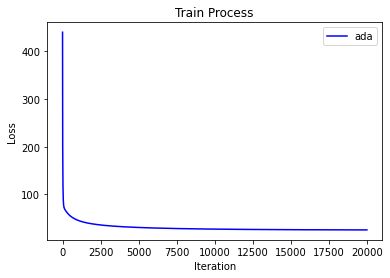

In [11]:
plt.plot(np.arange(len(cost)), cost, color = 'b', label = 'ada')
plt.title('Train Process')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

Stochastic Gradient Descent 使得训练速度更快，将一个 sample 代入梯度下降，做一次参数更新。

In [19]:
# 实现思路与 sgd1 是一样的。但是呢，代码整洁与效率上，明显 sgd1 更好，但是我想保留，留作纪念。
def sgd(x_train, y_train, l_rate = 0.0001, epoch_num = 3000, lamda2 = 0.1):
    sample_num  = x_train.shape[0]
    feature_num = x_train.shape[1]
    order      = np.arange(sample_num)
    w          = np.zeros(feature_num)
    b          = 0.0
    cost       = []
    for _ in range(epoch_num):
        for _ in range(sample_num):
            random_index = random.randint(0,sample_num - 1)
            hypo = np.dot(x_train[random_index], w) + b
            loss = y_train[random_index] - hypo
#             cost.append(loss ** 2)
            w_grad = loss * (-x_train[random_index]) + 2 * lamda2 * w
            b_grad = loss
#             w_grad = np.dot( [y_train[random_index] - hypo], [x_train[random_index]]) + 2 * lamda2 * w
#             b_grad = np.dot( [y_train[random_index] - hypo], [x_train[random_index]]).squeeze()
            w      -= l_rate * w_grad
            b      -= l_rate * b_grad
    return w, b, cost

def sgd1(x_train, y_train, l_rate = 0.0001, epoch_num = 3000, lamda2 = 0.1):
    sample_num  = x_train.shape[0]
    feature_num = x_train.shape[1]
    order      = np.arange(sample_num)
    w          = np.zeros(feature_num)
    b          = 0.0
    cost       = []
    for _ in range(epoch_num):
        hypo = np.dot(x_train, w) + b
        loss = y_train - hypo
        rand = np.random.randint(0, sample_num)
        cost.append(1.0 / (2 * sample_num) * (loss ** 2).sum() + lamda2 * (w ** 2).sum())
#         print(cost)
#         print(loss[rand])
        w_grad = -x_train[rand] * loss[rand] / sample_num + 2 * lamda2 * w
        w      -= l_rate * w_grad
        b      -= l_rate * loss[rand]

       
    return w, b, cost
    
w3, b3, cost3 = sgd1(x_train_set, y_train_set,  0.0001, 20000, 0)
# valid_regular(w3, b3, x_valid_set, y_valid_set, 0.1)

In [13]:
a = np.array([[1,2 ,3,4],
             [2, 3, 4, 5]])
b = np.array([1, 2, 3, 4])
a * b

array([[ 1,  4,  9, 16],
       [ 2,  6, 12, 20]])

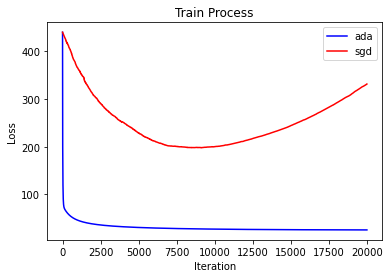

In [21]:
plt.plot(np.arange(len(cost)), cost, color = 'b', label = 'ada')
plt.plot(np.arange(len(cost3)), cost3, color = 'r', label = 'sgd')
plt.title('Train Process')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

似乎看起来也没那么快，而且  sgd 不容易到达最佳效果。